In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
from sklearn.svm import LinearSVC

In [2]:
data = pd.read_csv('dataset_31_credit-g.csv')

In [3]:
cat = data.select_dtypes(include=['object'])
cat.columns

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [4]:
cont = data.select_dtypes(exclude = ['object'])
cont.columns

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

Task 1.1

There are 21 features in the dataset. The features and their types are listed below:

class (target) ->	categorical <br>
checking_status -> 	categorical <br>
credit_history->	categorical<br>
purpose->	categorical<br>
savings_status->	categorical<br>
employment->	categorical<br>
personal_status->	categorical<br>
other_parties->	categorical<br>
property_magnitude->	categorical<br>
other_payment_plans->	categorical<br>
housing->	categorical<br>
job	->categorical<br>
own_telephone	->categorical	<br>
foreign_worker	->categorical<br>
<br>
duration -> continuous<br>
credit_amount->	continuous<br>
installment_commitment->	continuous<br>
residence_since	->continuous<br>
existing_credits	->continuous<br>
num_dependents->	continuous<br>
age->	continuous<br>

Task 1.2
Continuous features can be well described by boxplots since they we get information regarding the distribution of the feature. Since the target is categorical, a bar graph can suffice for the visualization of its distribution. We can observe from the plots that there are some values which are abnormally high.

Text(0.5, 1.0, 'Targe Class')

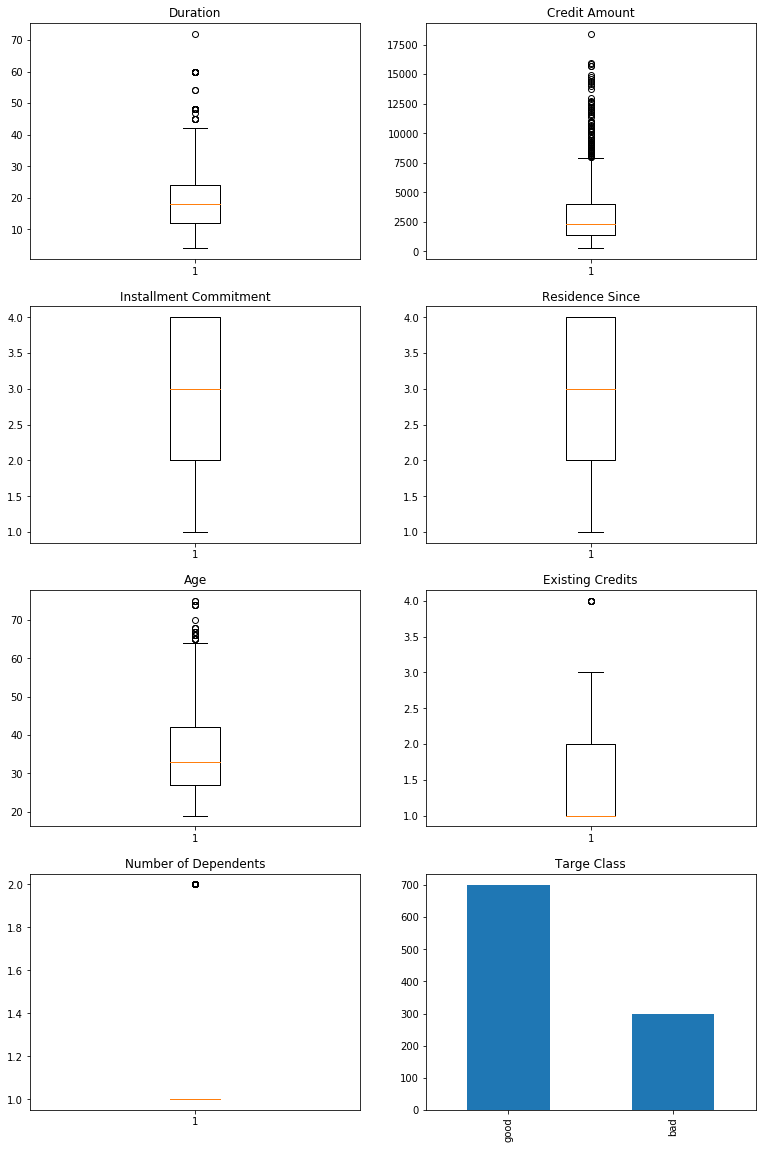

In [5]:
#Task 1.2

fig, ax1 = plt.subplots(4,2, figsize=(13,20))
ax1[0,0].boxplot(data.duration)
ax1[0,1].boxplot(data.credit_amount)
ax1[1,0].boxplot(data.installment_commitment)
ax1[1,1].boxplot(data.residence_since)
ax1[2,0].boxplot(data.age)
ax1[2,1].boxplot(data.existing_credits)
ax1[3,0].boxplot(data.num_dependents)
data['class'].value_counts().plot(ax = ax1[3,1],kind = 'bar')
# a.set_ylabel("Count")



ax1[0,0].set_title('Duration')
ax1[0,1].set_title('Credit Amount')
ax1[1,0].set_title('Installment Commitment')
ax1[1,1].set_title('Residence Since')
ax1[2,0].set_title('Age')
ax1[2,1].set_title('Existing Credits')
ax1[3,0].set_title('Number of Dependents')
ax1[3,1].set_title('Targe Class')

Task 1.3
The dataset is split into training and testing sets using train_test_split() function. Preprocessing of the data is done (without pipelining) using get_dummies() method of Pandas which generates one hot encoding of the input data. One Hot encoding helps in converting different classes of categorical variables into numeric/continuous values.

In [3]:
#Task 1.3
X = data[['checking_status', 'duration', 'credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status','other_parties','residence_since','property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker']]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, random_state=0) 

In [6]:
print(X_train.shape)
print(y_train.shape)
print(type(y_train))

(750, 20)
(750,)
<class 'pandas.core.series.Series'>


In [7]:
#One hot encoding 
X_train_OHC = pd.get_dummies(X_train_final)
X_test_OHC = pd.get_dummies(X_test)
X_val_OHC = pd.get_dummies(X_val)

Evaluating a Logistic Regression model

In [8]:
logreg = LogisticRegression(max_iter=1000)
# y_train_final = column_or_1d(y_train_final, warn=True)
logreg.fit(X_train_OHC,y_train_final)
score = logreg.score(X_val_OHC, y_val)
print(score)

0.7872340425531915


Task 1.4
Logistic Regression : The accuracy (score) of Logistic Regression seems to have decreased when it is computed using cross validation. When features are scaled, we observe an increase in accuracy.
Linear Support Vector Machines : Accuracy increases on scaling of features.
Nearest Neighbor: Accuracy increases on scaling of features.

In [1]:
#Task 1.4 without scaling, Logistic Regression
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (OneHotEncoder(), categorical), remainder = 'passthrough')
model = make_pipeline(preprocess, LogisticRegression(solver = 'liblinear', max_iter = 100))
#y_train = list(y_train)
scores = cross_val_score(model, X_train, y_train)
np.mean(scores)

NameError: name 'X_train' is not defined

In [10]:
#Task 1.4 with scaling, Logistic Regression
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical), remainder = 'passthrough')
model = make_pipeline(preprocess, LogisticRegression(solver = 'liblinear', max_iter = 100))
scores = cross_val_score(model, X_train, y_train)
np.mean(scores)

0.7586666666666668

In [11]:
#Task 1.4 without scaling, Linear SVM 
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LinearSVC(max_iter=1000, tol=0.0001, dual = False))
scores = cross_val_score(model, X_train, y_train)
np.mean(scores)

0.7533333333333332

In [12]:
#Task 1.4  with scaling, Linear SVM
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LinearSVC(max_iter=1000, tol=0.0001, dual = False))
scores = cross_val_score(model, X_train, y_train)
np.mean(scores)

0.7546666666666667

In [13]:
#Task 1.4  without scaling, Nearest Neighbor
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, KNeighborsClassifier())
scores = cross_val_score(model, X_train, y_train, cv = 3)
np.mean(scores)

0.7000000000000001

In [14]:
#Task 1.4 with scaling,  Nearest Neighbor 
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, KNeighborsClassifier())
scores = cross_val_score(model, X_train, y_train, cv = 3)
np.mean(scores)

0.7066666666666667

Task 1.5
Logistic Regression: Accuracy value has improved after finding optimal parameters using GridSearch
Linear SVM:Accuracy value has improved after finding optimal parameters using GridSearch
Nearest Neighbor:Accuracy value has improved after finding optimal parameters using GridSearch


In [15]:
#1.5 GridSearch on KNN
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 90, 7)}
grid_knn = GridSearchCV(model, param_grid=param_grid,
                    cv=10, return_train_score=True)
grid_knn.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
# print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

best mean cross-validation score: 0.743
best parameters: {'kneighborsclassifier__n_neighbors': 15}


In [16]:
#1.5 GridSearch on Logistic Regression
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LogisticRegression(max_iter = 1000))
param_grid={'logisticregression__C':np.arange(0.01, 1.5, 0.01)}
grid_lr = GridSearchCV(model,param_grid = param_grid,cv=10,return_train_score=True)
grid_lr.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",grid_lr.best_params_)
print("accuracy :",grid_lr.best_score_)

tuned hyperparameters :(best parameters)  {'logisticregression__C': 1.0}
accuracy : 0.7626666666666668


In [17]:
#1.5 GridSearch on Linear SVC
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
model = make_pipeline(preprocess, LinearSVC(max_iter = 1000, dual = False))
param_grid = {'linearsvc__C':[0.0001,0.001,0.01,0.1,1,10]}
grid_svc = GridSearchCV(model,param_grid = param_grid,cv=5,return_train_score=True)
grid_svc.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",grid_svc.best_params_)
print("accuracy :",grid_svc.best_score_)

tuned hyperparameters :(best parameters)  {'linearsvc__C': 0.1}
accuracy : 0.7653333333333333


In [18]:
#Plotting best model - Linear SVC (C=0.1)
print("test-set score: {:.3f}".format(grid_svc.score(X_test, y_test)))

test-set score: 0.736


Linear SVC has a slightly higher accuracy value than Logistic Regression and seems to perform well. It produces a test-set score of 70.4%

In [19]:
#extracting the mean test scores from knn, lr and svc
knn_values = grid_knn.cv_results_['mean_test_score']
lr_values = grid_lr.cv_results_['mean_test_score']
svc_values = grid_svc.cv_results_['mean_test_score']

#extracting knn parameters
knn_params = []
k = grid_knn.cv_results_['params']
for d in k:
    knn_params.append(d['kneighborsclassifier__n_neighbors'])

#extracting lr parameters
lr_params = []
l = grid_lr.cv_results_['params']
for d in l:
    lr_params.append(d['logisticregression__C'])

#extracting svc parameters
svc_params = []
l = grid_svc.cv_results_['params']
for d in l:
    svc_params.append(d['linearsvc__C'])

Visualizing results

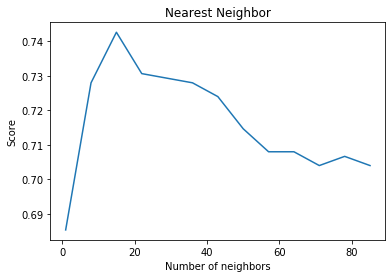

In [20]:
plt.plot(knn_params, knn_values)
plt.title('Nearest Neighbor')
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.show()

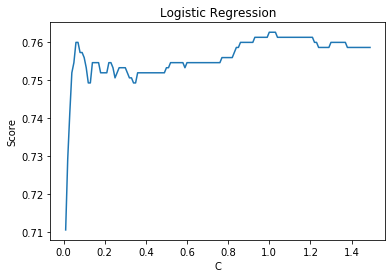

In [21]:
for i in lr_params:
    i = np.log(i)
plt.plot(lr_params, lr_values)
plt.title('Logistic Regression')
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

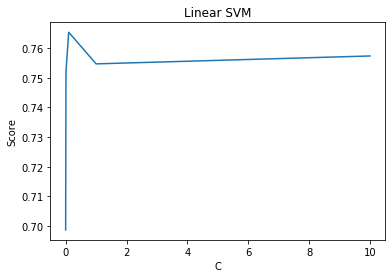

In [22]:
plt.plot(svc_params, svc_values)
plt.title('Linear SVM')
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

Task 1.6
Logistic Regression: After changing to shuffle kflod, accuracy did show an improvement. With shuffle kfold with a different random seed, accuracy improved as well.
Linear SVM: After changing to shuffle kflod, accuracy did show an improvement. With shuffle kfold with a different random seed, accuracy improved as well.
Nearest Neighbor: After changing to shuffle kflod, accuracy did show an improvement. With shuffle kfold with a different random seed, accuracy improved as well.

In [23]:
#Task 1.6 Logistic Regression
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
kfold = KFold(n_splits=10, shuffle = True)
model = make_pipeline(preprocess, LogisticRegression(max_iter = 1000))
param_grid={'logisticregression__C':np.arange(0.01, 1.5, 0.01)}
grid_lr_kf = GridSearchCV(model,param_grid = param_grid,cv=kfold, return_train_score=True)
grid_lr_kf.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",grid_lr_kf.best_params_)
print("accuracy :",grid_lr_kf.best_score_)

tuned hyperparameters :(best parameters)  {'logisticregression__C': 0.08}
accuracy : 0.752


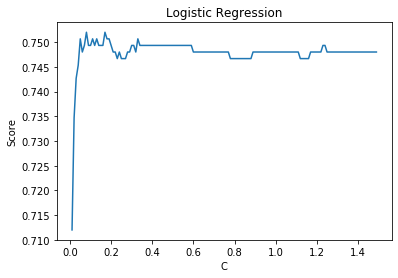

In [24]:
#extracting lr parameters
lr_values1 = grid_lr_kf.cv_results_['mean_test_score']
lr_params1 = []
l = grid_lr_kf.cv_results_['params']
for d in l:
    lr_params1.append(d['logisticregression__C'])
for i in lr_params1:
    i = np.log(i)
plt.plot(lr_params1, lr_values1)
plt.title('Logistic Regression')
plt.xlabel('C')
plt.ylabel('Score')
plt.show()


In [25]:
#Task 1.6 Linear SVC
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
kfold = KFold(n_splits=10, shuffle = True)
model = make_pipeline(preprocess, LinearSVC(max_iter = 1000, dual = False))
param_grid = {'linearsvc__C':[0.0001,0.001,0.01,0.1,1,10]}
grid_svc_kf = GridSearchCV(model,param_grid = param_grid,cv=kfold,return_train_score=True)
grid_svc_kf.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",grid_svc_kf.best_params_)
print("accuracy :",grid_svc_kf.best_score_)

tuned hyperparameters :(best parameters)  {'linearsvc__C': 0.01}
accuracy : 0.752


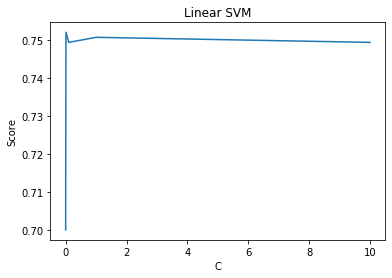

In [26]:
svc_values1 = grid_svc_kf.cv_results_['mean_test_score']

#extracting svc parameters
svc_params1 = []
l = grid_svc_kf.cv_results_['params']
for d in l:
    svc_params1.append(d['linearsvc__C'])
plt.plot(svc_params1, svc_values1)
plt.title('Linear SVM')
plt.xlabel('C')
plt.ylabel('Score')
plt.show()

In [27]:
#Task 1.6 Nearest Neighbor
categorical = X_train.dtypes == object
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))
kfold = KFold(n_splits=10, shuffle = True)
model = make_pipeline(preprocess, KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 90, 7)}
grid_knn_kf = GridSearchCV(model, param_grid=param_grid,
                    cv=kfold, return_train_score=True)
grid_knn_kf.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_knn_kf.best_score_))
print("best parameters: {}".format(grid_knn_kf.best_params_))

best mean cross-validation score: 0.745
best parameters: {'kneighborsclassifier__n_neighbors': 15}


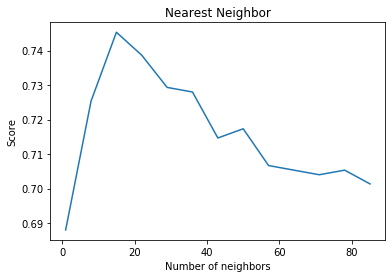

In [28]:
knn_values1 = grid_knn_kf.cv_results_['mean_test_score']
knn_params1 = []
k = grid_knn_kf.cv_results_['params']
for d in k:
    knn_params1.append(d['kneighborsclassifier__n_neighbors'])
plt.plot(knn_params1, knn_values1)
plt.title('Nearest Neighbor')
plt.xlabel('Number of neighbors')
plt.ylabel('Score')
plt.show()

In [29]:
#with random seed kfold, LinearSVC
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical), remainder='passthrough')



model = make_pipeline(preprocess, LinearSVC(tol=0.0001, max_iter=1000, dual=False))

kfold = KFold(n_splits=10, random_state=10, shuffle= True)

param_grid = {'linearsvc__C':  (0.001,0.01,0.1,1,10)}
grid_svm = GridSearchCV(model, param_grid=param_grid,
                    cv=kfold, return_train_score=True)

grid_svm = grid_svm.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_svm.best_score_))
print("best parameters: {}".format(grid_svm.best_params_))


best mean cross-validation score: 0.763
best parameters: {'linearsvc__C': 0.01}


In [30]:
#with random seed kfold, Logistic Regression
preprocess = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical), remainder='passthrough')

# model = make_pipeline(preprocess, LinearSVC(tol=0.0001, max_iter=1000, dual=False))

kfold = KFold(n_splits=10, random_state=10, shuffle= True)

model = make_pipeline(preprocess, LogisticRegression(max_iter = 1000))
param_grid={'logisticregression__C':np.arange(0.01, 1.5, 0.01)}
grid_lr_kf = GridSearchCV(model,param_grid = param_grid,cv=kfold, return_train_score=True)
grid_lr_kf.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",grid_lr_kf.best_params_)
print("accuracy :",grid_lr_kf.best_score_)

tuned hyperparameters :(best parameters)  {'logisticregression__C': 0.08}
accuracy : 0.7613333333333333


In [31]:
#with random seed, kfold, Nearest Neighbor
kfold = KFold(n_splits=10, random_state=10, shuffle= True)
model = make_pipeline(preprocess, KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 90, 7)}
grid_knn_kf = GridSearchCV(model, param_grid=param_grid,
                    cv=kfold, return_train_score=True)
grid_knn_kf.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid_knn_kf.best_score_))
print("best parameters: {}".format(grid_knn_kf.best_params_))

best mean cross-validation score: 0.743
best parameters: {'kneighborsclassifier__n_neighbors': 15}


In [32]:
#with random seed in train-test split
#Logistic Regression
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=5, test_size=0.20) #0.25 test default
kf = KFold(n_splits=10, shuffle=True, random_state=5)

model = make_pipeline(preprocess, LogisticRegression(max_iter = 1000))
param_grid={'logisticregression__C':np.arange(0.01, 1.5, 0.01)}
grid_lr_kf = GridSearchCV(model,param_grid = param_grid,cv=kfold, return_train_score=True)
grid_lr_kf.fit(X_tr,y_tr)

print("tuned hyperparameters :(best parameters) ",grid_lr_kf.best_params_)
print("accuracy :",grid_lr_kf.best_score_)

tuned hyperparameters :(best parameters)  {'logisticregression__C': 0.11}
accuracy : 0.765


In [33]:
#with random seed in train-test split
#Linear SVC
model = make_pipeline(preprocess, LinearSVC(tol=0.0001, max_iter=1000, dual=False))

kfold = KFold(n_splits=10, random_state=10, shuffle= True)

param_grid = {'linearsvc__C':  (0.001,0.01,0.1,1,10)}
grid_svm = GridSearchCV(model, param_grid=param_grid,
                    cv=kfold, return_train_score=True)

grid_svm = grid_svm.fit(X_tr, y_tr)

print("best mean cross-validation score: {:.3f}".format(grid_svm.best_score_))
print("best parameters: {}".format(grid_svm.best_params_))

best mean cross-validation score: 0.756
best parameters: {'linearsvc__C': 0.01}


In [34]:
#with random seed in train-test split
#Linear SVC
model = make_pipeline(preprocess, KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors':  np.arange(1, 90, 7)}
grid_knn_kf = GridSearchCV(model, param_grid=param_grid,
                    cv=kfold, return_train_score=True)
grid_knn_kf.fit(X_tr, y_tr)
print("best mean cross-validation score: {:.3f}".format(grid_knn_kf.best_score_))
print("best parameters: {}".format(grid_knn_kf.best_params_))

best mean cross-validation score: 0.750
best parameters: {'kneighborsclassifier__n_neighbors': 8}


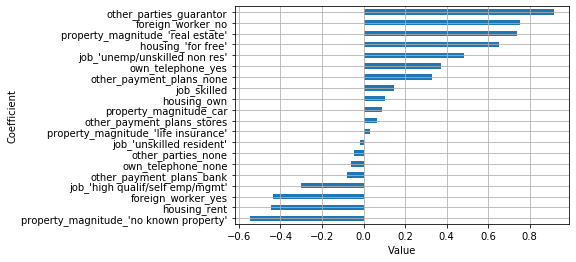

In [35]:
#Task 1.7
#the best model was a logistic regression model
categorical = X_train.dtypes == object
preprocess_171 = make_column_transformer(
    (StandardScaler(), ~categorical),
    (OneHotEncoder(), categorical))

model_final = make_pipeline(preprocess_171, LogisticRegression(random_state=0, solver='liblinear'))
params = {'logisticregression__C':[.005, .01, .05, .1, .5, 1, 5, 10]}
kf = KFold(n_splits=10, shuffle=True, random_state=5)
grid_final = GridSearchCV(model_final, param_grid = params, cv = kf, return_train_score = True)
grid_final.fit(X_train, y_train)


val = grid_final.best_estimator_.named_steps['logisticregression'].coef_
cols = []
X_train_OHE = pd.get_dummies(X_train) #one-hot encoding #61 columns
for col in X_train_OHE.columns:
    cols.append(col)
mapping = dict(zip(val[0], cols))
sorted_coef = np.absolute(val[0]).sort()
alist = val[0][::-1]
plot_values = pd.DataFrame(columns=['coef_name','coef_val']) #creating
for i in range(20):
    new_row = {'coef_name':mapping[alist[i]], 'coef_val':alist[i]}
    plot_values = plot_values.append(new_row,ignore_index=True )
plot_values = plot_values.sort_values('coef_val')
ax = plot_values.plot.barh(x='coef_name', y='coef_val')
ax.set_xlabel('Value')
ax.set_ylabel('Coefficient')
ax.get_legend().remove()
ax.grid()


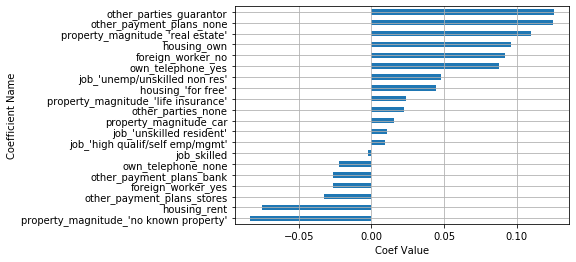

In [36]:
#LinearSVC
model = make_pipeline(preprocess, LinearSVC(tol=0.0001, max_iter=1000, dual=False))

kfold = KFold(n_splits=10, random_state=10, shuffle= True)

param_grid = {'linearsvc__C':  (0.001,0.01,0.1,1,10)}
grid2 = GridSearchCV(model, param_grid=param_grid,
                    cv=kfold, return_train_score=True)

grid2 = grid_svm.fit(X_tr, y_tr)

val = grid2.best_estimator_.named_steps['linearsvc'].coef_
cols = []
X_tr_oh = pd.get_dummies(X_train)
for col in X_tr_oh.columns:
    cols.append(col)
mapping = dict(zip(val[0], cols))
sorted_coef = np.absolute(val[0]).sort()
alist = val[0][::-1]
plot_values = pd.DataFrame(columns=['coef_name1','coef_val1'])
for i in range(20):
    new_row = {'coef_name1':mapping[alist[i]], 'coef_val1':alist[i]}
    plot_values = plot_values.append(new_row,ignore_index=True )
plot_values = plot_values.sort_values('coef_val1')
ax = plot_values.plot.barh(x='coef_name1', y='coef_val1')
ax.set_xlabel('Coef Value')
ax.set_ylabel('Coefficient Name')
ax.get_legend().remove()
ax.grid()